In [47]:
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np
from wordcloud import WordCloud
import utils
import umap
import hdbscan
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/kylehamilton/MyDocuments/ML-Labs/nuero-symbolic-AI/neuro-symbolic-ai-systematic-review/scopus/utils.py'>

In [51]:
a=pd.read_csv("scopus-filtered-by-top-publication - Aparna.csv")

In [53]:
a.columns

Index(['Key', 'Item Type', 'Publication Year', 'Author', 'Title',
       'Abstract Note', 'include', 'relavance', 'Unnamed: 8',
       'Publication Title', 'DOI', 'Url', 'Date', 'Date Added',
       'Date Modified', 'Include (0,1)', 'Notes/Criteria'],
      dtype='object')

In [55]:
a=a[['Key','Title','Abstract Note','include']]
# a[a['include']==1]

In [56]:
k=pd.read_csv("scopus-filtered-by-top-publication - Kyle.csv")

In [57]:
k=k[['Key','Title','Include (01)']]
k=k.rename(columns = {'Include (01)':'include'})

In [58]:
# k[k['include']==1]

In [60]:
b = pd.merge(a, k, on=["Key"], indicator="merge_indicator")

In [61]:
b=b.rename(columns = {'Title_x':'Title', 'Abstract Note':'Abstract','include_x':'include_aparna', 'include_y':'include_kyle'})
b=b[['Key','Title','Abstract','include_aparna','include_kyle']]

In [62]:
b.to_csv('include_comparison.csv',index=False)

In [64]:
# b[b['include_aparna']!=b['include_kyle']]

In [71]:
both=len(b[(b['include_aparna']==1) & (b['include_kyle']==1)])

In [69]:
aparna=len(b[(b['include_aparna']==1) & (b['include_kyle']==0)])

In [70]:
kyle=len(b[(b['include_aparna']==0) & (b['include_kyle']==1)])

In [43]:
union_ak=b[(b['include_aparna']==1) | (b['include_kyle']==1)].sort_values(by=['include_aparna','include_kyle'],ascending=False)

In [73]:
union_ak.to_csv('include_union.csv',index=False)

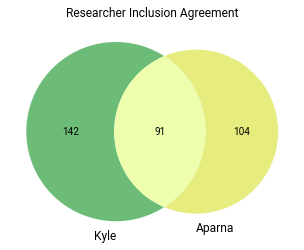

In [72]:
from matplotlib_venn import venn2
venn2(subsets = (kyle, aparna, both), set_labels = ('Kyle', 'Aparna'), alpha=1, set_colors=('#6cbc78', '#e6ec7e'))
plt.title("Researcher Inclusion Agreement")
plt.show()